# <span style="color:blue"> <center>Teacher / TD3 : 4TPU279U $-$ Bachelor 1st year $-$ spring 2023</center></span>
# <center>Introduction à la programmation Python</center>
# <hr style="border:1px solid black"><center> Traitement des données et représentation graphique </center><hr style="border:1px solid black">
</br>

<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot </div>

<hr style="border:1px solid grey">

Les sujets suivants seront abordés dans ce notebook :
- Traitement des fichiers de données
- Les bases de la représentation graphique
- Guide de survie pour les travaux pratiques

## <hr style="border:1px solid black">  Traitement des fichiers de données  <hr style="border:1px solid black">

### Utilisation des fonctions intrinsèques python
> A partir d'un fichier de données **localisé dans le répertoire** `data_examples`, lui-même situé au même endroit que le fichier jupypter-notebook, ce dernier peut être *ouvert* en utilisant la fonction intégrée [`open()`](https://docs.python.org/3/library/functions.html#open).
> Un exemple est donné ci-dessous avec le fichier de données `data_sin.csv` où le second argument de `open()` - à savoir `r` (= read)- représente un traitement type *lecture*.

In [ ]:
file = open('data_examples/data_sin.txt','r')
print(type(file))

*Remarque : pour visualiser le contenu de `data_sin.txt` dans un jupyter-notebook, vous pouvez cliquer sur `Fichier/Ouvrir` et choisir le fichier dans le répertoire courant*.

> le contenu de `data_sin.txt` peut être importé en utilisant la fonction `_io.TextIOWrapper`
appelée `readlines()`. Dans ce cas, les données sont stockées dans `data` sous la forme d'une liste de chaînes de caractères.

In [ ]:
data = file.readlines()
print(data)

> Pour extraire la première ligne, nous pouvons utiliser `readline()` (sans s !). Ensuite, `readlines()` peut être utilisé en toute sécurité.

In [ ]:
file = open('data_examples/data_sin.txt','r')
data = file.readline()
data = file.readlines()
print(data)

> La chaîne de caractères `\n` indique que la ligne actuelle est terminée et qu'une nouvelle ligne débute à la suite. Ceci peut être illustré en utilisant `print()`.Par exemple :

In [ ]:
print('Hello\nworld!')

> Après avoir inspecté `data_sin.txt`, nous savons que nous avons 2 colonnes de données et que la première ligne renvoie le type de données. Dans l'état, malheureusement, `data` est une simple liste contenant les éléments des 2 colonnes concaténées.

> Pour séparer les éléments d'une ligne, nous pouvons reconnaître l'espace `' '` comme séparateur. Notez que `'.'` est également un séparateur permettant d'identifier les nombres décimaux. Pour séparer les éléments d'une ligne, nous pouvons retraiter les données et opérer *ligne par ligne* dans une boucle `for` en utilisant la fonction `split` :

In [ ]:
x = [ ] ; y = [ ]
for line in data:
    words = line.split(' ')
    #print(words)

> Puisque `words` est une liste de 2 éléments, il devient facile de stocker les données dans deux **listes** $x$ et $y$ et de convertir les chaînes de caractères en nombres flottants.

In [ ]:
x = [ ] ; y = [ ]
for line in data:
    words = line.split(' ')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(x)
print()
print(y)

> Pour résumer la façon de traiter un fichier de données contenant un en-tête et deux colonnes de données séparées par un espace, nous avons :

In [ ]:
file = open('data_examples/data_sin.txt','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.split(' ')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
#print(x)
#print()
#print(y)

> Pour une utilisation ultérieure, notons que si nous voulons opérer sur $x$ et $y$ en utilisant des opérateurs mathématiques, nous devrons les convertir en tableau `numpy`.

In [ ]:
from numpy import array
x = array(x)
y = array(y)

*Notons que même la commande `open` peut être utilisée pour écrire des données mais n'est pas bien adaptée pour gérer les listes et les tableaux. Il est préférable d'utiliser la fonction `savetxt` de la librairie numpy. Un exemple est donné ci-dessous*

> Par exemple, si vous voulez créer un fichier contenant 2 colonnes $(\theta,f)$ avec $f(\theta)=\cos(x)$ avec $\theta\in[0,\pi]$ pour 32 points de données, vous pouvez utiliser :

In [ ]:
from numpy import pi, cos, linspace, savetxt, column_stack, sin

theta = linspace(0.0,2*pi,64)
f     = cos(theta)

savetxt('data_examples/data_cos.txt', column_stack([theta,f]), fmt='%1.4f')

#### Note sur le fichier CSV
Un fichier de valeurs séparées par une virgule (*comma-separated values* [CSV](https://en.wikipedia.org/wiki/Comma-separated_valuesCSV)) est un fichier texte délimité qui utilise une virgule pour séparer les valeurs. Chaque ligne du fichier est un enregistrement de données. Un fichier CSV stocke généralement des données tabulées (nombres et texte) en texte brut, auquel cas chaque ligne comporte le même nombre de champs. Les fichiers séparés par un délimiteur alternatif portent souvent l'extension ".csv" malgré l'utilisation d'une séparation des champs différent de la virgule.

##### Exercice 3.0 :  Format CSV Anglais  <hr style="border:1px solid grey">
1. Ouvrir le fichier de données `data_sin_en.csv` localisé dans le dossier `data_examples`.
2. Extraire les 2 colonnes et stocker les résultats dans 2 tableaux. Notons que le séparateur de champs est la virgule `','`.
3. Afficher les résultats.

<span style="color:red">**solution :**</span>

In [ ]:
file = open('data_examples/data_sin_en.csv','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.split(',')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(x)
print()
print(y)

<hr style="border:1px solid grey">

##### Exercice 3.1 :  Format CSV Français  <hr style="border:1px solid grey">
1. Ouvrir le fichier de données `data_sin_en.csv` localisé dans le dossier `data_examples`.
2. Extraire les 2 colonnes et stocker les résultats dans 2 tableaux. 
3. Afficher les résultats.

*Notons qu'il s'agit d'un fichier de données CSV en français. Dans ce cas, le séparateur est le point-virgule ";". Le séparateur décimal est la virgule ",". Pour stocker les données dans un tableau, vous devrez donc remplacer la virgule par un point. Cela peut être fait avec la fonction `replace()`.* 

Un exemple est donné ci-dessous :

In [ ]:
test = '3,14116'
test.replace(',','.')

<span style="color:red">**solution :**</span>

In [ ]:
file = open('data_examples/data_sin_fr.csv','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.replace(',','.').split(';')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(x)
print()
print(y)

<hr style="border:1px solid grey">

### Utilisation de Pandas

[Pandas](https://en.wikipedia.org/wiki/Pandas_(software)) est une bibliothèque écrite pour le langage de programmation Python pour la manipulation et l'analyse de données. En particulier, elle offre des structures de données et des opérations pour manipuler des tableaux numériques et des séries temporelles appelées *DataFrames*.

[Pandas](https://pandas.pydata.org) est principalement utilisé pour l'analyse de données et la manipulation associée de données tabulées dans les *DataFrames*. Pandas permet d'importer des données à partir de différents formats de fichiers tels que CSV, JSON, Parquet, tableaux ou requêtes de bases de données type SQL et Microsoft Excel. La bibliothèque pandas est construite à partir d'une autre bibliothèque, NumPy, orientée pour travailler efficacement avec les tableaux.

> Lire et traiter un fichier `CSV`

In [ ]:
from pandas import read_csv

data = read_csv('data_examples/harelynx.csv')
print(type(data))
print(data)

> Lire et traiter un fichier `EXCEL`

In [ ]:
from pandas import read_excel

data = read_excel('data_examples/harelynx.xls')
print(type(data))
print(data)

> Convertir un fichier `panda DataFrame` vers un `numpy array`

In [ ]:
data_numpy_array = data.to_numpy()
print(type(data_numpy_array))
#print(data_array)

> Convertir un `numpy array` vers `pandas DataFrame`

In [ ]:
from pandas import DataFrame

data_pandas = DataFrame(data_numpy_array,columns=['t', 'lievre', 'lynx'])
print(data_pandas)

> Exporter des données `pandas DataFrame` dans un fichier `CSV`

In [ ]:
# with the index and the header (default)
data_pandas.to_csv('data_examples/lievrelynx_hi.csv') 

# without the index and the header
data_pandas.to_csv('data_examples/lievrelynx.csv', header=False, index=False)

> Statistiques descriptives with `pandas`

In [ ]:
print(data_pandas['lievre'].describe())
print()
print(data_pandas['lynx'].describe())

##### Exercice 3.2 :   <hr style="border:1px solid grey">
Étant donné un ensemble de données $\{x\}_{i=1}^{N}$, la moyenne ($\mu$) et l'écart type ($\sigma$) sont donnés par :
$$\mu = \frac{1}{N}\sum_{i=1}^N x_i$$ et $$ \sigma=\sqrt{\frac{1}{N-1}\sum_{i=1}^N(x_i-\mu)^2}$$.
> Charger le fichier de données `lynxhare.csv` en utilisant `pandas` et le convertir en un tableau numpy.

> Générer deux tableaux numpy 1D appelés `hare` et `lynx`.

> En utilisant les fonctions intégrées de python (`min`, `max`, `sum`, `len`), calculez les valeurs min/max, $\mu$ et $\sigma$ pour les populations de lièvres et de lynx. 

> Imprimez les résultats dans un format approprié et comparez-les aux valeurs de `pandas`.

<span style="color:red">**solution :**</span>

In [ ]:
from numpy  import sqrt
from pandas import read_csv

data = read_csv('data_examples/harelynx.csv')

data_array = data.to_numpy()

hare = data_array[:,1] 
lynx = data_array[:,2] 

print('min(hare) = %12.6f'%min(hare))
print('max(hare) = %12.6f'%max(hare))

mu = sum(hare)/len(hare)
sig= sqrt(sum((hare - mu)**2)/(len(hare)-1))

print('mu (hare) = %12.6f'%mu )
print('sig(hare) = %12.6f'%sig)

<hr style="border:1px solid grey">

## <hr style="border:1px solid black"> Bases de la représentation graphique <hr style="border:1px solid black">
Ci-dessous quelques exemples de représentation graphique en python avec une complexité croissante. Une vaste galerie d'exemples peut être trouvée ici [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html). Les tracés 1D peuvent être realisés en utilisant la (sous-)bibliothèque 
[`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de [`matplotlib`](https://matplotlib.org)

> Notez que l'alias `plt` sera utilisé tout au long de ce notebook pour invoquer `pyplot`.

In [ ]:
import matplotlib.pyplot as plt

#### Graphique 1D simple

> Traçons $y=\sin(2\pi t)\exp(-t)$ pour $t\in[0,5]$ avec $n=40$ points de grille

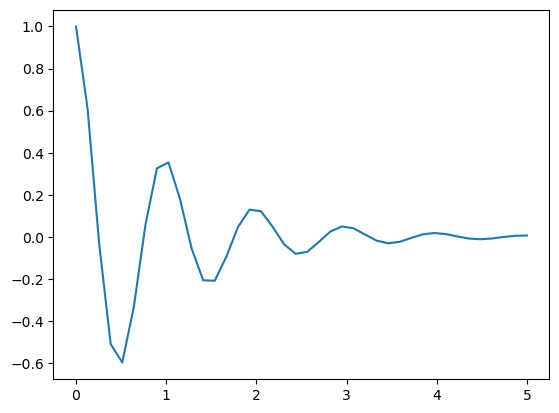

In [1]:
from numpy import pi, exp, cos, linspace
import matplotlib.pyplot as plt

n    =  40
tmin =   0
tmax =   5

t = linspace(tmin,tmax,n)
y = cos(2*pi*t)*exp(-t)

plt.plot(t,y)

> Par défaut, la fonction [`plot()`](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html) interpole (segments droits) entre les points de données et les données ne sont pas représentées par des marqueurs.

> Dans les exemples ci-dessous, vous pouvez choisir : [`linestyle`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), [`markers`](https://matplotlib.org/stable/api/markers_api.html), [`color`](https://matplotlib.org/stable/tutorials/colors/colors.html) et ajouter un `étiquette` pour chaque graphique. La fonction [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) doit être appelée pour que l'étiquette soit ajoutée sur le graphique.

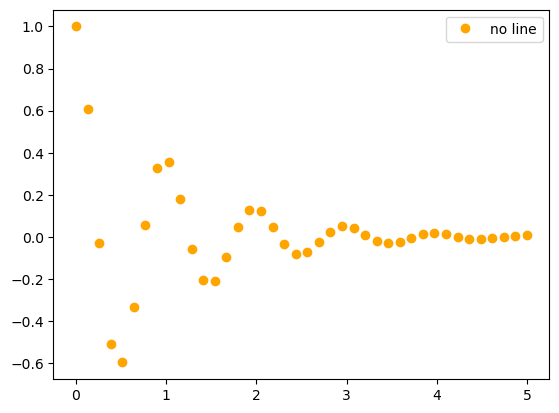

In [2]:
plt.plot(t, y, marker='o', linestyle='', color='orange', label='no line')
plt.legend()

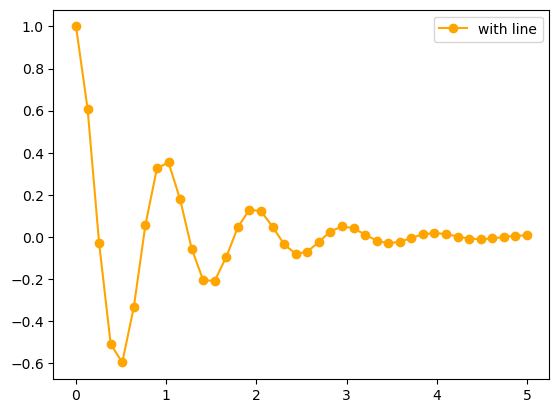

In [3]:
plt.plot(t, y, marker='o', linestyle='solid', color='orange', label='with line')

plt.legend()

> Jouons avec les options de ligne et de marqueur

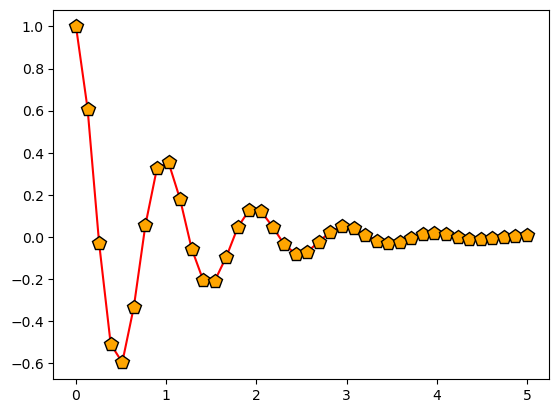

In [4]:
plt.plot(t, y, marker='p', linestyle='solid', color='red', \
         linewidth=1.5, ms=10.0, mew=1.0, mec='black', mfc='orange')

##### Exercice 3.3 :  <hr style="border:1px solid grey">
Trouver l'action des options `linewidth`, `ms`, `mew`, `mec` et `mfc` dans l'exemple précédent.

<hr style="border:1px solid grey">

##### Exercice 3.4 :  <hr style="border:1px solid grey">
En utilisant les fonctions de l'**Exercice 2.1** du **TD2** tracer:
$$f(x)=4x^2\exp(-2x)$$ 

$$g(x)=\frac{x^2}{2}\left(1-\frac{x}{2}\right)^2\exp(-x)$$

$$h(x)= \frac{4x^2}{243}\left(3 - 2x + \frac{2}{9}x^2\right)^2 \exp\left(-\frac{2x}{3}\right)$$
avec $x\in[0,20]$ et $n=128$ points de donnée, en suivant les consignes suivantes :
1. Pour toutes les courbes, il n'y a pas de marqueurs.
2. Les courbes doivent être de couleur orange, rouge et violette pour $f(x)$, $g(x)$ et $h(x)$, respectivement.
3. La légende doit être affichée.

<span style="color:red">**solution :**</span>

In [ ]:
from numpy import exp, linspace
import matplotlib.pyplot as plt

def func_f(x):
    return 4*x**2 * exp(-2*x)

def func_g(x):
    return x**2/2 * (1 - x/2)**2 * exp(-x)

def func_h(x):
    return 4*x**2/243 * (3 - 2*x + 2/9*x**2)**2 * exp(-2*x/3)

n    = 128
xmin =   0
xmax =  20

x = linspace(xmin,xmax,n)

f = func_f(x=x)
g = func_g(x=x)
h = func_h(x=x)

plt.plot(x,f,marker='',linestyle='solid', color='orange', linewidth=1.5, label='f(x)')
plt.plot(x,g,marker='',linestyle='solid', color='red',    linewidth=1.5, label='g(x)')
plt.plot(x,h,marker='',linestyle='solid', color='purple', linewidth=1.5, label='h(x)')

plt.legend()

<hr style="border:1px solid grey">

> Voici un exemple pour définir les limites du tracé avec $x\in[0,12]$ et $y\in[0,0.3]$.

In [ ]:
import matplotlib.pylab as plt

plt.plot(x,f,marker='',linestyle='solid', color='orange', linewidth=1.5, label='f(x)')
plt.plot(x,g,marker='',linestyle='solid', color='red',    linewidth=1.5, label='g(x)')
plt.plot(x,h,marker='',linestyle='solid', color='purple', linewidth=1.5, label='h(x)')

plt.legend()

plt.xlim(0,12)
plt.ylim(0,0.3)

> Les étiquettes des axes $x$ et $y$ sont ajoutées en utilisant `xlabel()` et `ylabel()`. 

> Les symboles dollar dans l'étiquette correspondent au formatage [$\LaTeX$] (https://en.wikibooks.org/wiki/LaTeX/Mathematics) des équations.

> Les graduations des axes $x$ et $y$ peuvent être définis explicitement en utilisant `xticks()` et `yticks()` ainsi que `arange()`.

> > La figure peut être sauvegardée en utilisant la fonction [`savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).

In [ ]:
import matplotlib.pylab as plt
from numpy import arange

plt.plot(x,f,marker='',linestyle='solid', color='orange', linewidth=1.5, 
         label='$f(x)=4x^2\exp(-2x)$')
plt.plot(x,g,marker='',linestyle='solid', color='red',    linewidth=1.5,
         label='$g(x)=\\frac{x^2}{2}\\left(1-\\frac{x}{2}\\right)^2\\exp(-x)$')
plt.plot(x,h,marker='',linestyle='solid', color='purple', linewidth=1.5,
         label='$h(x)=\\frac{4x^2}{243}\\left(3 - 2x + \\frac{2}{9}x^2\\right)^2 \\exp\\left(-\\frac{2x}{3}\\right)$')
plt.legend()

plt.xlabel('$x$')
plt.ylabel('$function$')

# x-ticks for x in [0,20] with step 1
plt.xticks(arange(0.0, 20, 1 ))

# y-ticks for y in [0,0.3] with step 0.02
plt.yticks(arange(0.0, 0.3, 0.02))

plt.xlim(0,15)
plt.ylim(0,0.3)

plt.savefig('figure_examples/figure_test.png', dpi=300, format='png', transparent=True)

##### Exercice 3.5 :   <hr style="border:1px solid grey">

Nous fournissons un fichier de données `comete_C2022E3ZTF.csv` qui rassemble les observations de la comète C/2022 E3 (ZTF) du 22 mars 2022 au 25 février 2023. Ces données sont disponibles sur le [site web du LESIA](https://lesia.obspm.fr/comets/lib/all-obs-table.php?Code=CK22E030&y1=1908&m1=01). Nous voulons tracer la distance par rapport au soleil ($r$) et à la terre ($d$) en fonction du [jour julien](https://fr.wikipedia.org/wiki/Jour_julien) ($j$). Une visualisation de la trajectoire est disponible [ici](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=C%2F2022%20E3&view=VOP).

1. Aller en ligne et vérifier où se trouvent $j$, $r$ et $d$ dans le tableau.
2. Vérifier le fichier de données situé dans le répertoire `data_examples` et identifier les lignes correspondantes. 
3. Charger les données et extraire les 3 colonnes.
4. Sur le même graphique, tracer $r$ et $d$ en fonction de $j$.
5. Ajoutez les étiquettes des axes et une légende.

<div class="alert alert-block alert-warning">
<b>Attention :</b> vous pourriez avoir des problèmes avec certaines données qui ne peuvent pas être converties en flottant. Trouvez un moyen de contourner le problème en utilisant, par exemple, la fonction `replace()` pour remplacer le caractère par un flottant (disons 0.0)
</div>

<span style="color:red">**solution 1:**</span>

In [ ]:
import matplotlib.pylab as plt

j = [ ]
r = [ ]
d = [ ]

file = open('data_examples/comete_C2022E3ZTF.csv','r')
for line in file:

    words = line.replace('-','0.0').split(',')
    
    j.append( float(words[2]) )
    r.append( float(words[4]) )
    d.append( float(words[5]) )

plt.plot(j,r,marker='o',linestyle='',markersize=3,label='X = sun')
plt.plot(j,d,marker='o',linestyle='',markersize=3,label='X = earth')

plt.xlabel('Julian day')
plt.ylabel('comet - X distance (au)')
plt.legend()

'astronomical unit'

<span style="color:red">**solution 2:**</span>

*Nous définissons ici une fonction qui vérifie si la chaîne de caractères peut être convertie en un nombre flottant*

In [ ]:
def isfloat(x):    
    try:
        float(x)
        return True
    
    except ValueError:
        return False

*Examples:*

In [ ]:
print( isfloat(x='1.4') )
print( isfloat(x='1.-') )

In [ ]:
import matplotlib.pylab as plt

j = [ ]
r = [ ]
d = [ ]

file = open('data_examples/comete_C2022E3ZTF.csv','r')

for line in file:

    words = line.split(',')
    
    if ( isfloat(x=words[2]) and isfloat(x=words[4]) and isfloat(x=words[5]) ):
    
        j.append( float(words[2]) )
        r.append( float(words[4]) )
        d.append( float(words[5]) )

plt.plot(j,r,marker='o',linestyle='',markersize=3,label='X = earth')
plt.plot(j,d,marker='o',linestyle='',markersize=3,label='X = sun')

plt.xlabel('Julian day')
plt.ylabel('comet - X distance (au)')
plt.legend()
    
    

<hr style="border:1px solid grey">

##### Exercice 3.6 :   <hr style="border:1px solid grey">
A partir du fichier de données `harelynx.csv` situé dans `data_examples`, tracer la variation de la population de lièvres et de lynx en fonction du temps.
Suivez les consignes suivantes :
1. Les données du fichier `lynxlievre.csv` doivent être chargées en utilisant `pandas`.
2. Les données doivent être converties en tableau `numpy`.
3. A partir du tableau `numpy`, 3 colonnes seront extraites $(t,x,y)$.
4. Sur le même graphique, tracer $x(t)$ pour les lièvres et $y(t)$ pour les lynx.
5. Calculer la moyenne des 2 populations en utilisant la fonction [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) de la bibliothèque `numpy`.
6. Tracer la moyenne sous forme de lignes horizontales en utilisant la fonction [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) de la bibliothèque `matplotlib.pyplot`.
6. Ajouter la légende et un titre.
7. Adapter l'espacement des graduations suivant $x$ et $y$, la taille de la figure, la couleur et le type de marqueurs.

**Un exemple est donné ci-dessous:**
<img src="./figure_examples/figure_lynxhare_ref.png" alt="Alternative text" width="500"/>

<span style="color:red">**solution :**</span>

In [ ]:
from pandas import read_csv
from numpy  import arange, mean
import matplotlib.pylab as plt

data = read_csv('data_examples/harelynx.csv')

In [ ]:
data_array = data.to_numpy()

In [ ]:
t = data_array[:,0]
x = data_array[:,1]
y = data_array[:,2]

In [ ]:
plt.plot(t,x,marker='o',label='hare', color='black', linewidth=1.0, mfc='white')
plt.plot(t,y,marker='D',label='lynx', color='red',   linewidth=1.0)
plt.xlabel("Year")
plt.ylabel("Population ($\\times 10^3$)")

plt.xticks(arange(1840,1940,10))
plt.yticks(arange(0, 160, 10))
plt.title('Fluctuations in the numbers of hare and lynx (Hudson’s Bay)')

plt.axhline(mean(x), color='black', linestyle='--', linewidth=1.0, label='mean(hare)')
plt.axhline(mean(y), color='red',   linestyle='--', linewidth=1.0, label='mean(lynx)')

plt.legend(loc=2)

plt.xlim(1840,1940)
plt.ylim(0,155)

<hr style="border:1px solid grey">

## <hr style="border:1px solid black">  Guide de survie pour les travaux pratiques <hr style="border:1px solid black">
</br>

A partir d'un exemple, dans ce guide de survie, nous allons :

1. Représenter graphiquement les données à l'aide de python. Ajouter les étiquettes des axes, les unités, la légende.
2. Ajuster un modèle linéaire sur les données. 
3. Ajouter le modèle sur le graphique et enregistrer la figure.

### Example

In water-resources engineering, the sizing of reservoirs depends on accurate estimates of
water flow in the river that is being impounded. For some rivers, long-term historical
records of such flow data are difficult to obtain. In contrast, meteorological data on
precipitation are often available for many years past. Therefore, it is often useful to
determine a relationship between flow and precipitation. This relationship can then be
used to estimate flows for years when only precipitation measurements were made. The
following data are available for a river: [<sup>1</sup>](#fn1)

*Dans le domaine de l'ingénierie des ressources en eau, le dimensionnement des réservoirs dépend d'une estimation précise du débit de la rivière que l'on considère. Pour certains cours d'eau, il est difficile d'obtenir des enregistrements historiques à long terme du débit. En revanche, les données météorologiques sur les précipitations sont souvent disponibles pour de plus longues périodes. Par conséquent, il est souvent utile de déterminer une relation entre le débit et les précipitations. Cette relation peut alors être utilisée pour estimer les débits pour les années où seules les précipitations ont été mesurées. Les données suivantes sont disponibles pour une rivière :*

Precip. (cm/yr)|  88.9 | 108.5 | 104.1 | 139.7 | 127.0 | 94.0 | 116.8 | 99.1 |
---------------|-------|-------|-------|-------|-------|------|-------|------|
Débit (m$^3$/s)|  14.6 |  16.7 |  15.3 |  23.2 |  19.5 | 16.1 |  18.1 | 16.6 |

Par la suite on considérera une erreur de 10\% sur les valeurs du débit. 

<span id="fn1"> $^1$ Exemple extrait de *Applied Numerical Methods with MATLAB* by S. C. Chapra.</span>

### <hr style="border:1px solid black"> Charger les données <hr style="border:1px solid black">

#### Créer un tableau numpy avec les données brutes

> Ici, nous créons d'abord une liste avec les données qui seront converties en tableau `numpy`

> Attention : nous devons utiliser la notation anglaise avec le point comme séparateur décimale !

In [ ]:
from numpy import array

prec = [88.9, 108.5, 104.1, 139.7, 127.0, 94.0, 116.8, 99.1]
flow = [14.6,  16.7,  15.3,  23.2,  19.5, 16.1,  18.1, 16.6]

x  = array(prec)
y  = array(flow)

#### ... ou extraire les données à partir d'un fichier en utilisant la fonction intrinsèque de python

In [ ]:
file = open('data_examples/prec_flow.csv','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.split(',')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(x)
print()
print(y)

#### ... ou extraire les données à partir d'un fichier en utilisant pandas

In [ ]:
from pandas import read_csv

data_pandas = read_csv('data_examples/prec_flow.csv')
print(data_pandas)
#data_numpy_array = data_pandas.to_numpy()
#x = data_numpy_array[:,0]
#y = data_numpy_array[:,1]

#### calcul de l'erreur sur $y$ 

In [ ]:
err = 0.05*array(y)

### <hr style="border:1px solid black"> Représentation graphique <hr style="border:1px solid black">

#### En utilisant `matplolib`

In [ ]:
import matplotlib.pylab as plt
from numpy import arange

plt.plot(x,y,marker='o',color='black', linestyle='')
plt.xlabel("Precipitation (cm/yr)")
plt.ylabel("Flow (m$^3$/s)")

plt.xticks(arange(min(x)+1.1,max(x)+1,5))
plt.yticks(arange(min(y)+0.4,max(y),1))
plt.title('Water flow as a function of precipitation')

#plt.xlim()
#plt.ylim()

#### En utilisant `pandas`

> Pandas peut être utilisé pour réaliser des graphiques avec la fonction [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [ ]:
data_pandas.plot(x='prec',y='flow',kind='scatter',color='black')

#### Représentation graphiques avec les barres d'erreur

In [ ]:
import matplotlib.pylab as plt
from numpy import arange

plt.plot(x,y,marker='o',color='black', linestyle='')
plt.errorbar(x,y,err,linestyle='',color='blue')

plt.xlabel("Precipitation (cm/yr)")
plt.ylabel("Flow (m$^3$/s)")

plt.xticks(arange(min(x)+1.1,max(x)+1,5))
plt.yticks(arange(min(y)+0.4,max(y),1))
plt.title('Water flow as a function of precipitation')

#plt.xlim()
#plt.ylim()

### <hr style="border:1px solid black"> Perform a linear fit <hr style="border:1px solid black">

> L'ajustement est effectué en utilisant `curve_fit` de la bibliothèque `scipy.optimize`

> Etant donné $\{x_i,y_i\}^N_{i=1}$, l'erreur standard $\{\sigma_i\}^N_{i=1}$ sur $\{y_i\}^N_{i=1}$ et la fonction modèle $f_\textrm{model}(x;a_0,a_1,...a_m)$ où $\{a_k\}_{k=1}^m$ sont les coefficients à optimiser. Étant donné $\chi^2$ :
$$\chi^2=\sum_{i=1}^{N}\frac{\left[y_i-f_\textrm{model}\left(x_i;a_0,a_1,...a_m\right)\right]^2}{\sigma^2_i}$$
`curve_fit`performe la minimisation de $\chi^2$ par rapport à ces coefficients.

Nous définissons d'abord la fonction du modèle ; dans ce cas, il s'agit d'une fonction linéaire : $f(x)=a_0 +a_1x$.

In [ ]:
def fmodel(x,a0,a1):
    return a0 + a1*x

Nous appelons ensuite la fonction `curve_fit` 

> En entrée avec $(f_\textrm{modèle},x,y,\sigma)$. 

> En sortie, nous récupérons les valeurs optimales des coefficients (`popt`) et la matrice de (co)variance (`pcov`) sur l'estimation des coefficients.

In [ ]:
from scipy.optimize import curve_fit
from numpy import ones, sqrt

# standard error
sig = err

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=fmodel, xdata=x, ydata=y, sigma=sig)

# extract optimized coefficients
[a0, a1] = popt

# extract standard deviation errors
sa0 = sqrt(pcov[0,0])
sa1 = sqrt(pcov[1,1])

print('a0 = %.4f +/- %.4f'%(a0,sa0))
print('a1 = %.4f +/- %.4f'%(a1,sa1))

### <hr style="border:1px solid black"> Représentation du modèle linéaire <hr style="border:1px solid black">

Etant donné $x_\textrm{model}\in[\min(x),\max(x)]$ with $n=128$, calculons $y_\textrm{model}=f_\textrm{model}(x_\textrm{model};a_0,a_1)$ 

In [ ]:
from numpy import linspace

x_model = linspace(min(x),max(x),128)
y_model = fmodel(x=x_model,a0=a0,a1=a1)

Tracer les données expérimentales et la fonction du modèle linéaire ; enregistrer la figure

In [ ]:
import matplotlib.pylab as plt
from numpy import arange

plt.plot(x, y, marker='o', color='black', linestyle='', label='exp. data')
plt.errorbar(x,y,err,linestyle='',color='blue')

plt.plot(x_model,y_model, marker= '', color='red',  linestyle='-',
         label='linear regression with $f(x)= %.3f + %.3f x$'%(a0,a1))

plt.xlabel("Precipitation (cm/yr)")
plt.ylabel("Flow (m$^3$/s)")

plt.xticks(arange(min(x)+1.1,max(x)+1,5))
plt.yticks(arange(min(y)+0.4,max(y),1))

plt.legend()
plt.title('Water flow as a function of precipitation')

plt.savefig('figure_examples/figure_prec_flow.png', dpi=300, format='png', transparent=True)

### <hr style="border:1px solid black"> Utilisation du modèle linéaire <hr style="border:1px solid black">

Evaluez le débit annuel si les précipitations sont de 120 cm/an.

In [ ]:
prec = 120
flow = fmodel(x=prec,a0=a0,a1=a1)
print('flow = %.4f m^3/s for prec. = %.4f'%(prec,flow))